In [1]:
import re
import nltk
import numpy as np
import pandas as pd
from spacy.lang.en.stop_words import STOP_WORDS
from nltk.stem import PorterStemmer
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
stopwords=STOP_WORDS
stopwords

{"'d",
 "'ll",
 "'m",
 "'re",
 "'s",
 "'ve",
 'a',
 'about',
 'above',
 'across',
 'after',
 'afterwards',
 'again',
 'against',
 'all',
 'almost',
 'alone',
 'along',
 'already',
 'also',
 'although',
 'always',
 'am',
 'among',
 'amongst',
 'amount',
 'an',
 'and',
 'another',
 'any',
 'anyhow',
 'anyone',
 'anything',
 'anyway',
 'anywhere',
 'are',
 'around',
 'as',
 'at',
 'back',
 'be',
 'became',
 'because',
 'become',
 'becomes',
 'becoming',
 'been',
 'before',
 'beforehand',
 'behind',
 'being',
 'below',
 'beside',
 'besides',
 'between',
 'beyond',
 'both',
 'bottom',
 'but',
 'by',
 'ca',
 'call',
 'can',
 'cannot',
 'could',
 'did',
 'do',
 'does',
 'doing',
 'done',
 'down',
 'due',
 'during',
 'each',
 'eight',
 'either',
 'eleven',
 'else',
 'elsewhere',
 'empty',
 'enough',
 'even',
 'ever',
 'every',
 'everyone',
 'everything',
 'everywhere',
 'except',
 'few',
 'fifteen',
 'fifty',
 'first',
 'five',
 'for',
 'former',
 'formerly',
 'forty',
 'four',
 'from',
 'fron

In [3]:
len(stopwords)

326

In [4]:
df=pd.read_csv(r"Downloads\Twitter_Reviews.csv")
df

,Review_Id,User_Name,User_Image,Comment,Thumbs_Up_Count,Version,Review_Created_At,Sort_Order
0,d80a474e-421c-408e-aa49-b06185a3830a,Sean Rollins,https://play-lh.googleusercontent.com/a-/ACNPE...,Twitter's obsession with turning itself into t...,7121,9.65.0-release.0,28-10-2022 01:48,most_relevant
1,adce2dfc-11d4-43e0-b4b3-891d942a3457,Andrew Pike,https://play-lh.googleusercontent.com/a-/ACNPE...,Absolute rubbish. It still keeps refreshing af...,4833,9.56.2-release.0,26-08-2022 08:26,most_relevant
2,205b4fe2-50f6-4cbd-b63a-d6a3722dfa24,Dean Hampton,https://play-lh.googleusercontent.com/a/ALm5wu...,The most recent update has ruined this app. Th...,2409,9.56.2-release.0,26-08-2022 18:31,most_relevant
3,2b18dec4-3094-4539-8f6e-dc51fe62fb21,Dave,https://play-lh.googleusercontent.com/a/ALm5wu...,No closed caption (cc) button is present to di...,4033,9.56.2-release.0,26-08-2022 16:05,most_relevant
4,426d8c6f-df41-459d-936c-eea1154af0b8,Royce Miller,https://play-lh.googleusercontent.com/a-/ACNPE...,This app is frustrating as heck. When you're s...,1671,9.57.0-release.1,02-09-2022 07:37,most_relevant
...,...,...,...,...,...,...,...,...
1195,6385bae0-3945-48ae-b2fe-f7db9f5233a4,حسین طاهری,https://play-lh.googleusercontent.com/a-/ACNPE...,graet,1,9.65.1-release.0,05-11-2022 11:56,newest
1196,c8147b0c-cded-4c16-b7b4-0b9b79845677,Ye Mann Aung,https://play-lh.googleusercontent.com/a/ALm5wu...,I like,1,9.65.1-release.0,05-11-2022 11:54,newest
1197,cad48954-2dc1-49d0-ad38-aa2dbc367b29,Kazibwe Tonny,https://play-lh.googleusercontent.com/a/ALm5wu...,Great app,1,NaN,05-11-2022 11:53,newest
1198,50130c50-99aa-48e6-ac49-7cb9b4c704e7,Mandeep Jareda,https://play-lh.googleusercontent.com/a-/ACNPE...,5 star for Elon Musk ✌️,2,9.65.1-release.0,05-11-2022 11:53,newest


In [5]:
df=df.iloc[:,[-5,-1]]
df

,Comment,Sort_Order
0,Twitter's obsession with turning itself into t...,most_relevant
1,Absolute rubbish. It still keeps refreshing af...,most_relevant
2,The most recent update has ruined this app. Th...,most_relevant
3,No closed caption (cc) button is present to di...,most_relevant
4,This app is frustrating as heck. When you're s...,most_relevant
...,...,...
1195,graet,newest
1196,I like,newest
1197,Great app,newest
1198,5 star for Elon Musk ✌️,newest


In [6]:
from sklearn.preprocessing import LabelEncoder
label=LabelEncoder()
df.iloc[:,-1]=label.fit_transform(df.iloc[:,-1])
df

,Comment,Sort_Order
0,Twitter's obsession with turning itself into t...,0
1,Absolute rubbish. It still keeps refreshing af...,0
2,The most recent update has ruined this app. Th...,0
3,No closed caption (cc) button is present to di...,0
4,This app is frustrating as heck. When you're s...,0
...,...,...
1195,graet,1
1196,I like,1
1197,Great app,1
1198,5 star for Elon Musk ✌️,1


In [7]:
clean_text=[]
for i in range(0,len(df)):
    text=re.sub("[^A-Za-z]",' ',df["Comment"][i])
    text=text.lower()
    text=text.split()
    pst=PorterStemmer()
    text=[pst.stem(word)for word in text if word not in set(stopwords)]
    text=' '.join(text)
    clean_text.append(text)

In [8]:
from PIL import Image
img=np.array(Image.open(r"Downloads\twitter.png"))
img

array([[[  2,   2,   2, 110],
        [180, 180, 180, 238],
        [253, 253, 253, 255],
        ...,
        [250, 250, 250, 255],
        [158, 158, 158, 233],
        [  2,   2,   2, 110]],

       [[180, 180, 180, 238],
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        ...,
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        [158, 158, 158, 233]],

       [[253, 253, 253, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        ...,
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        [250, 250, 250, 255]],

       ...,

       [[250, 250, 250, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        ...,
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        [250, 250, 250, 255]],

       [[158, 158, 158, 233],
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        ...,
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        [158, 158, 158, 233]],

       [[  2

In [9]:
from wordcloud import WordCloud

In [10]:
word_cloud=WordCloud(width=200,height=200,margin=2,colormap="plasma",mask=img,background_color='white').generate(str(clean_text))

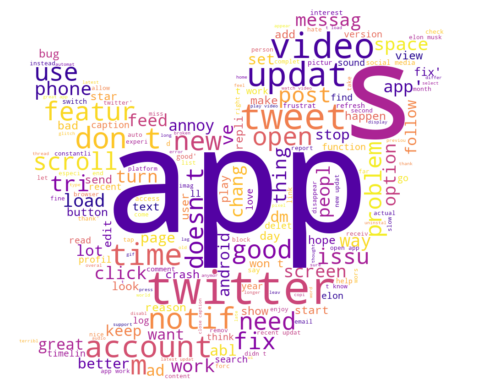

In [11]:
plt.imshow(word_cloud,interpolation="bilinear")
plt.axis("off")
plt.show()

In [12]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()
X=cv.fit_transform(clean_text).toarray()
y=df.iloc[:,-1].values

In [13]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=0)

In [14]:
from sklearn.naive_bayes import GaussianNB
ber=GaussianNB()
ber.fit(X_train,y_train)
y_pred=ber.predict(X_train)

In [15]:
from sklearn.metrics import accuracy_score
acc=accuracy_score(y_train,y_pred)
acc

0.9760416666666667

In [16]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_train,y_pred)
cm

array([[455,  23],
       [  0, 482]], dtype=int64)

In [17]:
from sklearn.metrics import classification_report
report=classification_report(y_train,y_pred)
report

'              precision    recall  f1-score   support\n\n           0       1.00      0.95      0.98       478\n           1       0.95      1.00      0.98       482\n\n    accuracy                           0.98       960\n   macro avg       0.98      0.98      0.98       960\nweighted avg       0.98      0.98      0.98       960\n'

In [18]:
from sklearn.ensemble import RandomForestClassifier
rndf=RandomForestClassifier()
rndf.fit(X_train,y_train)
y_pred=rndf.predict(X_train)

In [19]:
from sklearn.metrics import accuracy_score
acc=accuracy_score(y_train,y_pred)
acc

0.984375

In [20]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_train,y_pred)
cm

array([[470,   8],
       [  7, 475]], dtype=int64)

In [23]:
from sklearn.metrics import classification_report 
report=classification_report(y_train,y_pred)
report

'              precision    recall  f1-score   support\n\n           0       0.98      0.99      0.98       478\n           1       0.99      0.98      0.98       482\n\n    accuracy                           0.98       960\n   macro avg       0.98      0.98      0.98       960\nweighted avg       0.98      0.98      0.98       960\n'